In [1]:
import os
import torch
from torch.autograd import Function, Variable, grad
# from pyro.distributions import MultivariateNormal as MVN1
# from pyro.distributions.testing.symmetric_mvn import SymmetricMultivariateNormal as MVN2
from bvn import BivariateNormalRepTrick as MVN1
from bvn import BivariateNormalCanonical as MVN2
from matplotlib import pyplot
%matplotlib inline

In [3]:
mu = Variable(torch.zeros(2))
scale_triu = Variable(torch.eye(2, 2), requires_grad=True)
dist1 = MVN1(mu, scale_triu=scale_triu)
dist2 = MVN2(mu, scale_triu=scale_triu)

def compute_v(dist, x):
    return torch.stack([
        grad([x[i]], [scale_triu], create_graph=True)[0][0, 1]
        for i in range(2)
    ]).squeeze()

In [4]:
x = dist1.sample().squeeze()
compute_v(dist1, x)

Variable containing:
 0.0000
 0.2982
[torch.FloatTensor of size 2]

In [5]:
num_samples = 200

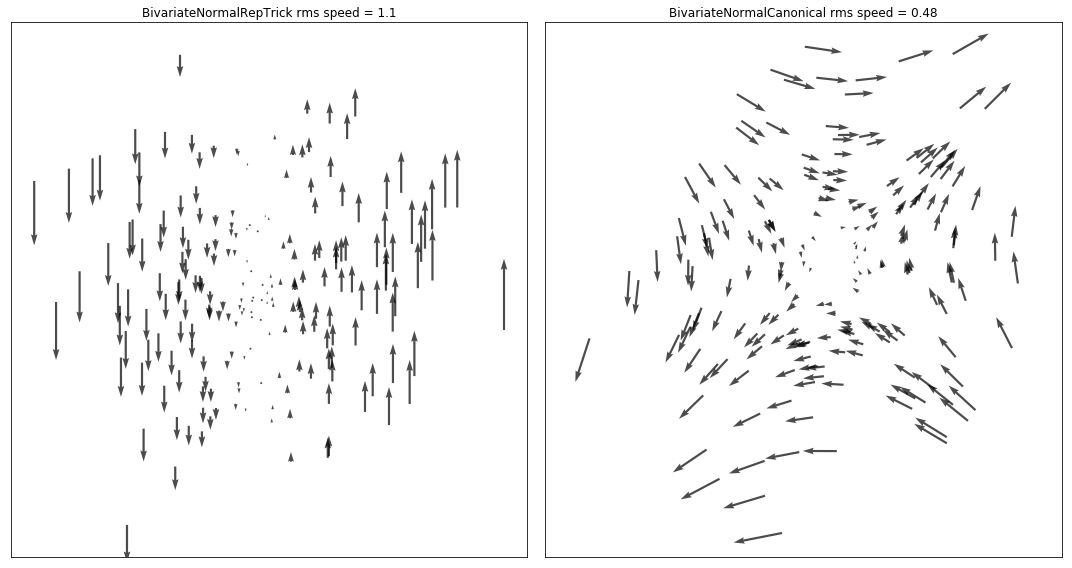

In [6]:
fig, axes = pyplot.subplots(1, 2, figsize=(15, 8))
fig.patch.set_color('white')
for ax, dist in zip(axes, [dist1, dist2]):
    x = torch.stack([dist.sample().squeeze() for i in range(num_samples)])
    v = torch.stack([compute_v(dist, xi) for xi in x])
    x = x.data.numpy()
    v = v.data.numpy()
    ax.quiver(x[:, 0], x[:, 1], v[:, 0], v[:, 1], alpha=0.7)
    ax.set_title('{} rms speed = {:0.2g}'.format(type(dist).__name__,(v ** 2).sum(-1).mean()))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.axis('equal')
fig.tight_layout()
pyplot.savefig(os.path.expanduser('~/Downloads/symmetric-mvn.png'))